# Report on the gradient descent optimization 
## Libraries import

In [1]:
from functions import f1, gradient_f1, f2, gradient_f2
from plotter import plotter_1D, plotter_2D, plotter_3D
from experiment import experiment_serie, create_table, create_summary
import numpy as np
import pandas as pd

## Given function charts

### Function 1

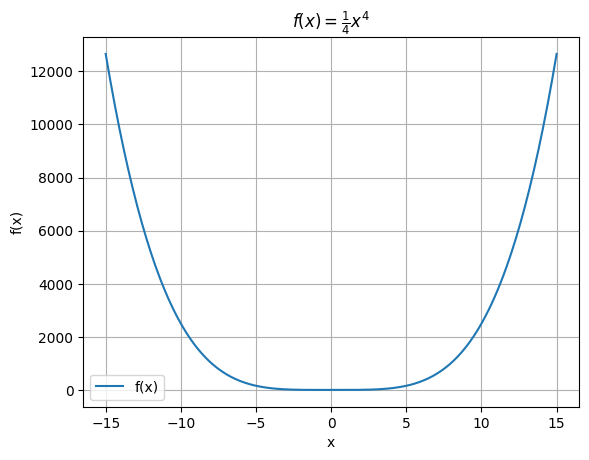

In [2]:
plotter_1D(f1, domain=(-15, 15), num_points=300, title="$f(x) = \\frac{1}{4}x^4$", x_label='x', y_label='f(x)', legend_label="f(x)")

### Function 2

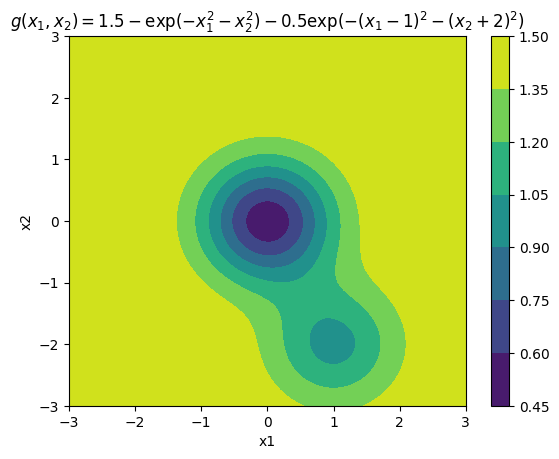

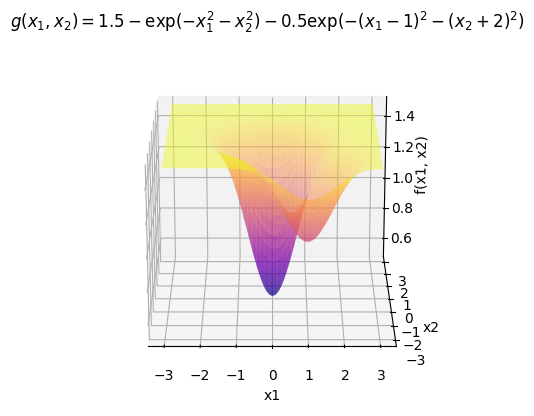

In [3]:
plotter_2D(f2, domain=[(-3, 3), (-3, 3)], title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")
plotter_3D(f2, domain=[(-3, 3), (-3, 3)], view=(20, -90), title="$g(x_1, x_2) = 1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$")

# Purpose of the experiments
I'm going to check the performance of the algorithms for different starting points and hyperparameters. I will conduct the examination of:
- 10 randomly selected starting points
- 6 different gradient step values ​​(step/learning rate)
- 3 different numbers of iterations<br>

I will select the best and worst values ​​from the results for each function and analyze them further.

## Function 1
### Table of results of all experiments

In [4]:
DOMAIN = (-4, 4)
START_POINTS = np.random.uniform(DOMAIN[0], DOMAIN[1], 10)
STEP_SIZES = (0.005, 0.01, 0.03, 0.05, 0.1, 0.12)
ITERATION_NUMBERS = (10000, 15000, 20000)
CORRECT_VALUE = 0
results, best, worst = experiment_serie(START_POINTS, f1, gradient_f1, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
df_f1 = pd.DataFrame(table)
df_f1.sort_values(by="Error value").head()

,Experiment number,Step size,Number of iterations,Starting points,End x,End y,Error value
0,1,0.005,10000,-3.413433,-0.099930,2.4930555432474439677e-05,0.099930
1,2,0.005,10000,0.540839,0.098321,2.3362901805167042717e-05,0.098321
2,3,0.005,10000,3.910636,0.099940,2.4939652406270460062e-05,0.099940
3,4,0.005,10000,1.399142,0.099726,2.4727001867361546923e-05,0.099726
4,5,0.005,10000,2.341488,0.099885,2.4885449993712557988e-05,0.099885


### Table of the average error value for each combination of gradient step and number of iterations

In [5]:
summary = create_summary(results[0], results[1], results[2], table)
df_summ1 = pd.DataFrame(summary)
df_summ1.sort_values(by="Error average")

,Step size,Iteration number,Error average
0,0.005,10000,0.099702
1,0.005,15000,0.081486
2,0.005,20000,0.070603
3,0.010,10000,0.070594
4,0.010,15000,0.057671
5,0.010,20000,0.049958
6,0.030,10000,0.040793
7,0.030,15000,0.033316
8,0.030,20000,0.028856
9,0.050,10000,0.031601


### Gradient transition plots for best and worst results


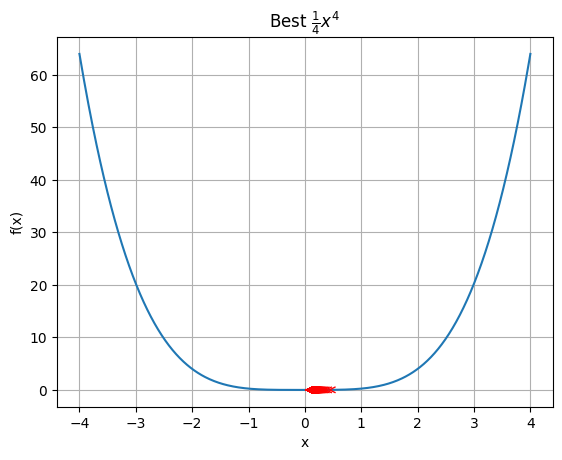

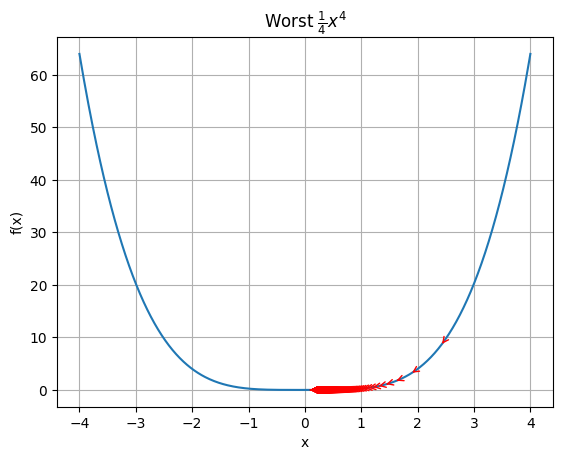

In [6]:
plotter_1D(f1, DOMAIN, best[0], best[1], num_points=500, title="Best $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)
plotter_1D(f1, DOMAIN, worst[0], worst[1], num_points=500, title="Worst $\\frac{1}{4}x^4$", x_label="x", y_label="f(x)", steps=True)

## Function 2

In [7]:
DOMAIN = [(-4, 4), (-4, 4)]
START_POINTS = []
for _ in range(10):
    x1 = np.random.uniform(DOMAIN[0][0], DOMAIN[0][1])
    x2 = np.random.uniform(DOMAIN[1][0], DOMAIN[1][1])
    START_POINT = np.array([x1, x2])
    START_POINTS.append(START_POINT)
STEP_SIZES = (0.005, 0.01, 0.03, 0.06, 0.1, 0.2)
ITERATION_NUMBERS = (5000, 10000, 15000)
CORRECT_VALUE = [0, 0]
results, best, worst = experiment_serie(START_POINTS, f2, gradient_f2, STEP_SIZES, ITERATION_NUMBERS, CORRECT_VALUE)
table = create_table(*results)
df_f2 = pd.DataFrame(table)
df_f2.sort_values(by="Error value").head()

,Experiment number,Step size,Number of iterations,Starting points,End x,End y,Error value
0,1,0.005,5000,"[2.9880667578557957853, -1.7564067705320329793]","[0.98451045157597100226, -1.9690205685587910286]",0.99274209202282859076,2.201432
1,2,0.005,5000,"[-1.3412566284277538387, -3.262361147830142194]","[-1.2829238974549308592, -3.2303182992407768104]",1.4993943275464476418,3.475752
2,3,0.005,5000,"[-2.4137120723432881064, -3.6282322186537934172]","[-2.4136590455603063677, -3.628206225593796919]",1.4999996876004648422,4.357709
3,4,0.005,5000,"[-1.3136929105913992544, -1.5316253813920326365]","[0.0034760137633066749672, -0.0069520275266133...",0.49657248367634162863,0.007773
4,5,0.005,5000,"[-1.9906836241519316744, -1.3592636871089318618]","[0.0034751034232041036505, -0.0069527758885126...",0.49657248367773276302,0.007773


### Table of the average error value for each combination of gradient step and number of iterations

In [8]:
summary = create_summary(results[0], results[1], results[2], table)
df_summ2 = pd.DataFrame(summary)
df_summ2.sort_values(by="Error average")

,Step size,Iteration number,Error average
0,0.005,5000,1.303671
1,0.005,10000,1.293595
2,0.005,15000,1.277003
3,0.010,5000,1.293596
4,0.010,10000,1.191622
5,0.010,15000,1.157013
6,0.030,5000,1.157016
7,0.030,10000,0.881442
8,0.030,15000,0.881411
9,0.060,5000,0.881442


### Gradient descent charts for best and worst results

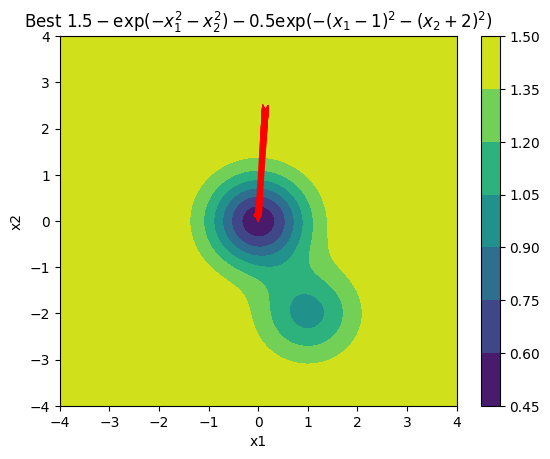

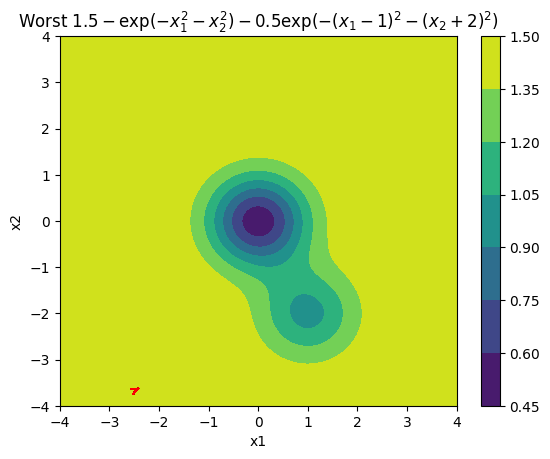

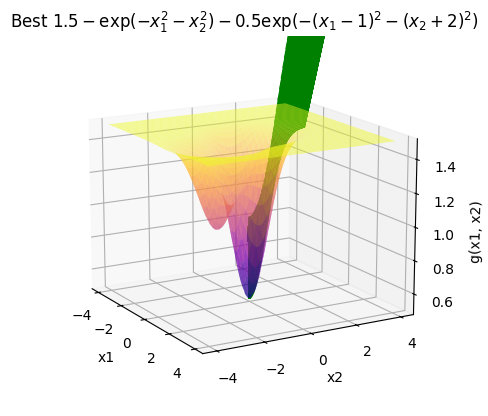

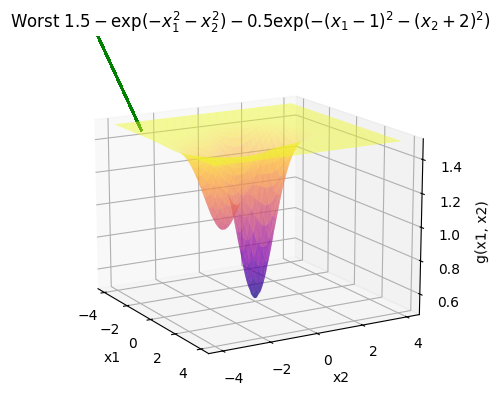

In [9]:
plotter_2D(f2, DOMAIN, best[0], num_points=500, title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$",
           x1_label="x1", x2_label="x2", steps=True)
plotter_2D(f2, DOMAIN, worst[0], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", steps=True)
plotter_3D(f2, DOMAIN, best[0], best[1], num_points=500,
           title="Best $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)
plotter_3D(f2, DOMAIN, worst[0], worst[1], num_points=500,
           title="Worst $1.5 - \exp(-x_1^2 - x_2^2) - 0.5 \exp(-(x_1 - 1)^2 - (x_2 + 2)^2)$", x1_label="x1", x2_label="x2", x3_label="g(x1, x2)", steps=True)

# Results and conclusions
## Function 1
### Results for individual points
The results for the first function show that the biggest problem for the allogrithm turned out to be the 'flat' surroundings of the function's minimum. Points that were generated far away from the minimum initially quickly headed toward it, but the closer they got, the value of the gradient rapidly decreased. \
For this reason, the algorithm achieved the best results for starting points as close to the minimum as possible.
### Results for hyperparameters
The smallest average error the algorithm achieved for beta=0.12 and number of iterations=20000. In general, increasing the number of iterations for the same value of the gradient step always increased the efficiency of the algorithm. Also, a larger step always had a positive effect on the result, but increasing it too much could result in the phenomenon of gradient explosion.
## Function 2
### Results for individual points
The results of the algorithm for the second function were very much affected by the starting point. When it was too far from the minimum (local or global) for some points no value of the gradient step or the number of iterations was able to bring the initial value closer to the minimum \ -After the whole passage of the algorithm the value of the function remained at g(x1, x2) = 1.5.
In the case when the initial point was near the local minimum then also regardless of the tested gradient step and the number of iterations, the algorithm could not get out of it reaching g(x1, x2) = 0.992742.\
However, some of the points that for smaller hyperparameters took the value of 1.5 managed to reach the local minimum when the gradient step and the number of iterations were increased.
It is worth noting that when the algorithm correctly steered to the minimum it determined it very accurately, regardless of the value of the hyperparameters.
### Results for hyperparameters
The algorithm also achieved the smallest average error for beta=0.2 and number of iterations=20000. Increasing the number of iterations and the gradient step positively affected the result, but the differences between the error values for different combinations of hyperparameters were small. Points near the minimum were very accurately determined even with the smallest hyperparameters, but the larger ones were able to correctly carry out the gradient descent also on some points further away from the minimum.